In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0,7.1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000,6.8
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,2.35,164000,8.5
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0,7.1


###### Now let's do some cleaning and filtering process, for here, we have some columns with numbers and some with characters. We will remove the columns with words in order to better analyze and do regressions in the future. 

In [4]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list)       

In [5]:
df_num = df[num_list]
#del movie # Get rid of movie df as we won't need it now
df_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,imdb_score,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,7.9,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,7.1,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,6.8,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,8.5,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,7.1,0,NaN,NaN,8,NaN


In [6]:
df_num = df_num.fillna(value=0, axis=1)

###### Now let's look at some correlations between some variables we are interested in. 

In [7]:
X = df_num.values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

###### hexbin is an axes method or pyplot function that is essentially a pcolor of a 2-D histogram with hexagonal cells. It can be much more informative than a scatter plot

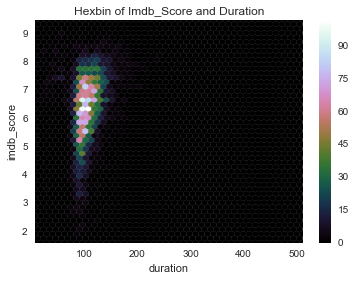

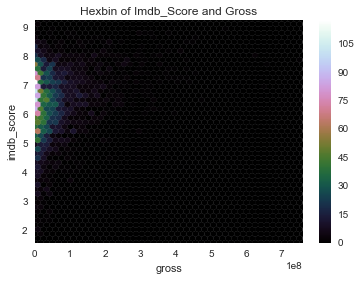

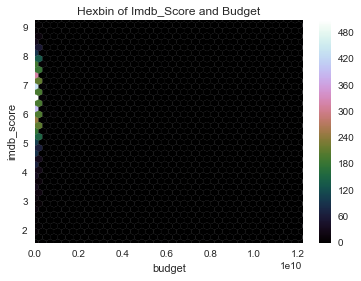

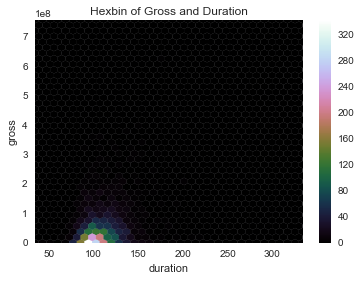

In [8]:
df.plot(y= 'imdb_score', x ='duration',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Duration')
df.plot(y= 'imdb_score', x ='gross',kind='hexbin',gridsize=45, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Gross')
df.plot(y= 'imdb_score', x ='budget',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Imdb_Score and Budget')
df.plot(y= 'gross', x ='duration',kind='hexbin',gridsize=35, sharex=False, colormap='cubehelix', title='Hexbin of Gross and Duration')

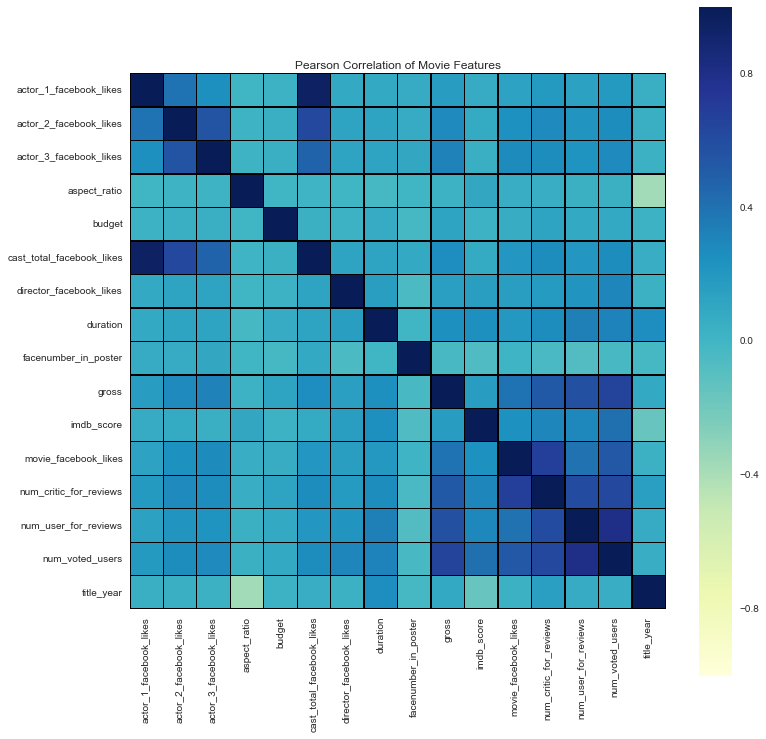

In [9]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num.astype(float).corr(),linewidths=0.4,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

In [10]:
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

###### Now having obtained the eigenvalues and eigenvectors, we will group them together by creating a list of eigenvalue, eigenvector tuples (immutable Python data objects). Following on from this we will sort the list in order of Highest eigenvalue to lowest eigenvalue and then use the eigenvalues to calculate both the individual explained variance and the cumulative explained variance for visualisation.

In [11]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

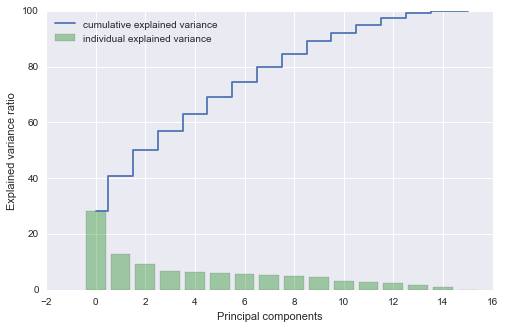

In [11]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

###### From the plot above, it can be seen that approximately 90% of the variance can be explained with the 9 principal components. Therefore for the purposes of this notebook, let's implement PCA with 9 components ( although to ensure that we are not excluding useful information, one should really go for 95% or greater variance level which corresponds to about 12 components).

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

In [14]:
from sklearn.cluster import KMeans

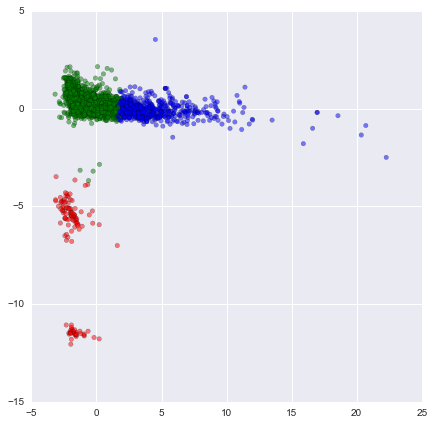

In [19]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_9d)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_9d[:,0],x_9d[:,2], c= label_color, alpha=0.5) 
plt.show()

In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [4]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,18 secs
H2O cluster version:,3.10.4.4
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_yataolu_m1lb4m
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [67]:
h2o.remove_all()

In [68]:
path = '/Users/yataolu/Desktop/datamining/movie_metadata.csv'

In [69]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [70]:
frame.describe()

Rows:5043
Cols:28




,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
type,enum,enum,int,int,int,int,enum,int,int,enum,enum,string,int,int,enum,int,string,string,int,enum,enum,enum,int,int,int,real,int,real
mins,,,1.0,7.0,0.0,0.0,,0.0,162.0,,,NaN,5.0,0.0,,0.0,NaN,NaN,1.0,,,,218.0,1916.0,0.0,1.18,0.0,1.6
mean,,,140.194271981,107.201073986,686.509212391,645.009760956,,6560.04706116,48468407.5268,,,NaN,83668.160817,9699.06385088,,1.37117296223,NaN,NaN,272.770808443,,,,39752620.4364,2002.47051672,1651.75447316,2.22040305473,7525.96450525,6.4421376165
maxs,,,813.0,511.0,23000.0,23000.0,,640000.0,760505847.0,,,NaN,1689764.0,656730.0,,43.0,NaN,NaN,5060.0,,,,12215500000.0,2016.0,137000.0,16.0,349000.0,9.5
sigma,,,121.601675396,25.1974408088,2813.32860687,1665.04172845,,15020.75912,68452990.4388,,,NaN,138485.256806,18163.799124,,2.01357592,NaN,NaN,377.982885566,,,,206114898.449,12.4745989193,4042.43886264,1.3851125353,19320.4451099,1.12511586573
zeros,,,0,0,907,89,,26,0,,,0,0,33,,2152,0,0,0,,,,0,0,55,0,2181,0
missing,19,104,50,15,104,23,13,7,884,0,7,0,0,0,23,13,153,0,21,12,5,303,492,108,13,329,0,0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar��,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000.0,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End��,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0.0,7.1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre��,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000.0,6.8


In [71]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [72]:
# assign target and inputs
y = 'imdb_score'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

imdb_score
[u'color', u'director_name', u'num_critic_for_reviews', u'duration', u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name', u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name', u'movie_title', u'num_voted_users', u'cast_total_facebook_likes', u'actor_3_name', u'facenumber_in_poster', u'plot_keywords', u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country', u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes', u'aspect_ratio', u'movie_facebook_likes']


In [11]:
# random forest

# initialize rf model
rf_model = H2ORandomForestEstimator(
    ntrees=500,                      # Up to 500 decision trees in the forest 
    max_depth=30,                    # trees can grow to depth of 30
    stopping_rounds=5,               # stop after validation error does not decrease for 5 iterations/new trees
    score_each_iteration=True,       # score validation error on every iteration/new tree
    model_id='rf_model')             # for easy lookup in flow


In [12]:
# train rf model
rf_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
rf_model

# view detailed results at http://localhost:54321/flow/index.html

drf Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_model


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.666384230794
RMSE: 0.816323606662
MAE: 0.58461604931
RMSLE: 0.129029586206
Mean Residual Deviance: 0.666384230794

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.719693099917
RMSE: 0.84834727554
MAE: 0.61748314402
RMSLE: 0.131357235872
Mean Residual Deviance: 0.719693099917
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-05-04 21:01:31,0.026 sec,0.0,nan,nan,nan,nan,nan,nan
,2017-05-04 21:01:32,0.992 sec,1.0,1.0448684,0.7738407,1.0917500,1.0954945,0.8119157,1.2001082
,2017-05-04 21:01:32,1.375 sec,2.0,1.0323353,0.7697085,1.0657162,0.9777497,0.7283602,0.9559945
,2017-05-04 21:01:32,1.681 sec,3.0,1.0197645,0.7559951,1.0399197,0.9248956,0.6916983,0.8554318
,2017-05-04 21:01:33,1.985 sec,4.0,1.0160642,0.7461918,1.0323864,0.9061646,0.6743213,0.8211343
---,---,---,---,---,---,---,---,---,---
,2017-05-04 21:01:41,9.813 sec,44.0,0.8191054,0.5876841,0.6709336,0.8456862,0.6165974,0.7151851
,2017-05-04 21:01:41,9.935 sec,45.0,0.8198884,0.5877823,0.6722170,0.8459667,0.6166529,0.7156597
,2017-05-04 21:01:41,10.085 sec,46.0,0.8187675,0.5865330,0.6703803,0.8464580,0.6171180,0.7164912
,2017-05-04 21:01:41,10.444 sec,47.0,0.8179411,0.5856007,0.6690276,0.8457339,0.6161651,0.7152659



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
genres,43402.3164062,1.0,0.5079993
num_voted_users,8490.5996094,0.1956255,0.0993776
title_year,4175.9116211,0.0962140,0.0488767
duration,3992.8764648,0.0919969,0.0467343
num_user_for_reviews,2859.0168457,0.0658724,0.0334632
---,---,---,---
aspect_ratio,570.3861694,0.0131418,0.0066760
cast_total_facebook_likes,468.6863709,0.0107986,0.0054857
actor_2_facebook_likes,402.6860046,0.0092780,0.0047132
actor_1_facebook_likes,375.6705322,0.0086555,0.0043970



See the whole table with table.as_data_frame()


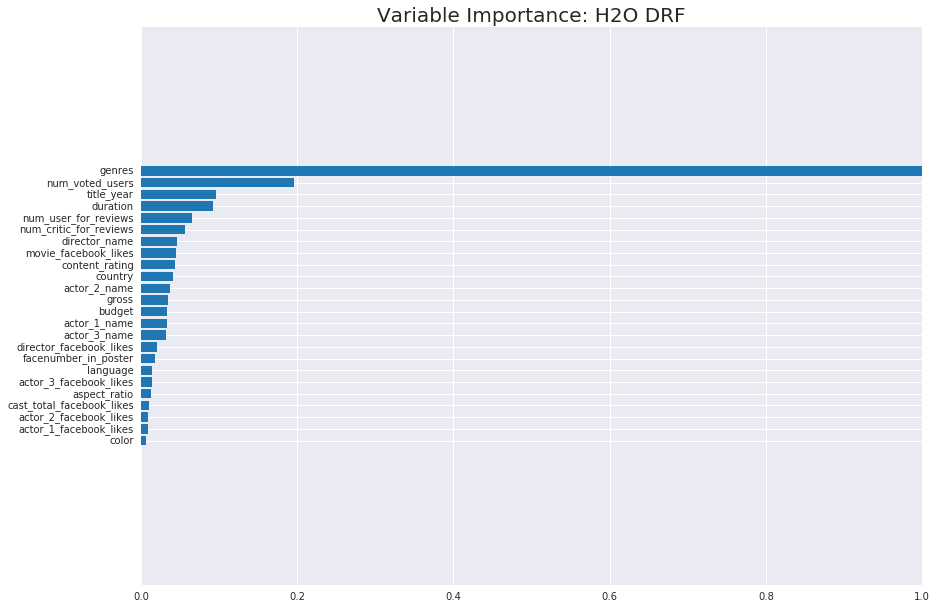

In [28]:
rf_model.varimp_plot(num_of_features=27)

In [14]:
rf_predictions = rf_model.predict(test[:-1])

drf prediction progress: |████████████████████████████████████████████████| 100%


In [29]:
print(rf_model.model_performance(test_data=test).r2())
print(rf_model.model_performance(test_data=test).mse())

0.411372673255
0.749804175254


In [16]:
test=test.cbind(rf_predictions)
test.head()

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,predict
Color,Sam Raimi,392,156,0,4000,James Franco,24000,3.3653e+08,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3��,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_tt_tt_1,1902,English,USA,PG-13,2.58e+08,2007,11000,2.35,0,6.2,6.50833
Color,Nathan Greno,324,100,15,284,Donna Murphy,799,2.00807e+08,Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance,Brad Garrett,Tangled��,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower|tower,http://www.imdb.com/title/tt0398286/?ref_=fn_tt_tt_1,387,English,USA,PG,2.6e+08,2010,553,1.85,29000,7.8,7.24583
Color,Gore Verbinski,313,151,563,1000,Orlando Bloom,40000,4.23033e+08,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest��,522040,48486,Jack Davenport,2,box office hit|giant squid|heart|liar's dice|monster,http://www.imdb.com/title/tt0383574/?ref_=fn_tt_tt_1,1832,English,USA,PG-13,2.25e+08,2006,5000,2.35,5000,7.3,7.29792
Color,Zack Snyder,733,143,0,748,Christopher Meloni,15000,2.91022e+08,Action|Adventure|Fantasy|Sci-Fi,Henry Cavill,Man of Steel��,548573,20495,Harry Lennix,0,based on comic book|british actor playing american character|final battle|origin of hero|reboot,http://www.imdb.com/title/tt0770828/?ref_=fn_tt_tt_1,2536,English,USA,PG-13,2.25e+08,2013,3000,2.35,118000,7.2,7.39375
Color,Joss Whedon,703,173,0,19000,Robert Downey Jr.,26000,6.2328e+08,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers��,995415,87697,Scarlett Johansson,3,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_tt_tt_1,1722,English,USA,PG-13,2.2e+08,2012,21000,1.85,123000,8.1,7.63542
Color,Peter Jackson,509,186,0,773,Adam Brown,5000,2.58355e+08,Adventure|Fantasy,Aidan Turner,The Hobbit: The Desolation of Smaug��,483540,9152,James Nesbitt,6,dwarf|elf|lake town|mountain|sword and sorcery,http://www.imdb.com/title/tt1170358/?ref_=fn_tt_tt_1,951,English,USA,PG-13,2.25e+08,2013,972,2.35,83000,7.9,7.50833
Color,Sam Mendes,750,143,0,393,Helen McCrory,883,3.0436e+08,Action|Adventure|Thriller,Albert Finney,Skyfall��,522030,2039,Rory Kinnear,0,brawl|childhood home|computer cracker|intelligence agency|terrorist cell,http://www.imdb.com/title/tt1074638/?ref_=fn_tt_tt_1,1498,English,UK,PG-13,2e+08,2012,563,2.35,80000,7.8,7.56042
Color,Tim Burton,451,108,13000,11000,Alan Rickman,40000,3.34185e+08,Adventure|Family|Fantasy,Johnny Depp,Alice in Wonderland��,306320,79957,Anne Hathaway,0,alice in wonderland|mistaking reality for dream|queen|shrinking|shrinking potion,http://www.imdb.com/title/tt1014759/?ref_=fn_tt_tt_1,736,English,USA,PG,2e+08,2010,25000,1.85,24000,6.5,6.61875
Color,Dan Scanlon,376,104,37,760,Tyler Labine,12000,2.68488e+08,Adventure|Animation|Comedy|Family|Fantasy,Steve Buscemi,Monsters University��,235025,14863,Sean Hayes,0,cheating|fraternity|monster|singing in a car|university,http://www.imdb.com/title/tt1453405/?ref_=fn_tt_tt_1,265,English,USA,G,2e+08,2013,779,1.85,44000,7.3,7.2875
Color,Michael Bay,366,150,0,464,Kevin Dunn,894,4.02077e+08,Action|Adventure|Sci-Fi,Glenn Morshower,Transformers: Revenge of the Fallen��,323207,3218,Ramon Rodriguez,0,autobot|decepticon|machine|sun|symbol,http://www.imdb.com/title/tt1055369/?ref_=fn_tt_tt_1,1439,English,USA,PG-13,2e+08,2009,581,2.35,0,6,6.42292


In [17]:
test_df=test.as_data_frame()

In [18]:
result = test_df.sort_values(['predict'],ascending=False)

In [19]:
result1 = result.reset_index(drop= True)
result1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score,predict
0,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000,28341469.0,Crime|Drama,...,English,USA,R,25000000.0,1994.0,745.0,1.85,108000,9.3,8.418750
1,Color,David Fincher,315.0,151.0,21000.0,637.0,Meat Loaf,11000,37023395.0,Drama,...,English,USA,R,63000000.0,1999.0,783.0,2.35,48000,8.8,8.245833
2,Black and White,Sidney Lumet,177.0,96.0,0.0,253.0,Lee J. Cobb,359,NaN,Crime|Drama,...,English,USA,Not Rated,350000.0,1957.0,259.0,1.66,40000,8.9,8.243750
3,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503,198655278.0,Drama|History|Romance|War,...,English,USA,G,3977000.0,1939.0,384.0,1.37,16000,8.2,8.070833
4,Color,Brian De Palma,147.0,142.0,0.0,638.0,F. Murray Abraham,14000,44700000.0,Crime|Drama,...,English,USA,R,25000000.0,1983.0,670.0,2.35,19000,8.3,8.068750


In [20]:
newdf = result1[result.columns[27:29]]

In [21]:
newdf

,imdb_score,predict
0,9.3,8.418750
1,8.8,8.245833
2,8.9,8.243750
3,8.2,8.070833
4,8.3,8.068750
5,8.5,8.068750
6,8.1,8.016667
7,8.4,7.997917
8,8.1,7.977083
9,8.2,7.966667


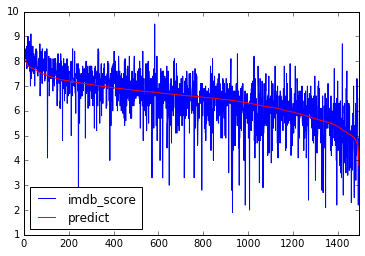

In [23]:
newdf.plot(color=['blue','red'])

In [73]:
# GBM with random hyperparameter search
# train many different GBM models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(0, 20, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [74]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.1         2    250         0.8   
1                0.2         6     50         0.5   
2                0.2         4    400         0.3   
3                0.1         6    300         0.1   
4                0.4        16    150         0.8   
5                0.5        12    400         0.2   
6                0.7         2    150         0.8   
7                0.9        14    300         0.4   
8                1.0         4    200         0.6   
9                0.9        10    100         1.0   
10               1.0        12    100         0.9   

                                                        model_ids  \
0    Grid_GBM_py_21_sid_93e6_model_python_1493946055718_3_model_2   
1    Grid_GBM_py_21_sid_93e6_model_python_1493946055718_3_model_7   
2    Grid_GBM_py_21_sid_93e6_model_python_1493946055718_3_model_9   
3    Grid_GBM_py_21_sid_93e6_model_python_1493946055718_3_model_3   
4    Grid_GBM_py_2

,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2017-05-04 21:56:40,14.261 sec,0.0,1.1352529,0.8850892,1.2887992,1.1299281,0.8633852,1.2767376
,2017-05-04 21:56:40,14.275 sec,1.0,1.1027270,0.8539589,1.2160067,1.1145610,0.8469156,1.2422461
,2017-05-04 21:56:40,14.282 sec,2.0,1.0857400,0.8392473,1.1788314,1.1006335,0.8354945,1.2113942
,2017-05-04 21:56:40,14.307 sec,3.0,1.0789137,0.8329327,1.1640548,1.0951214,0.8303389,1.1992910
,2017-05-04 21:56:40,14.314 sec,4.0,1.0661852,0.8215802,1.1367509,1.0837133,0.8200311,1.1744346
---,---,---,---,---,---,---,---,---,---
,2017-05-04 21:56:44,18.154 sec,140.0,0.5960784,0.4180290,0.3553095,0.8446518,0.6000743,0.7134367
,2017-05-04 21:56:44,18.179 sec,141.0,0.5951933,0.4173119,0.3542551,0.8433411,0.5989927,0.7112243
,2017-05-04 21:56:44,18.203 sec,142.0,0.5932147,0.4148811,0.3519037,0.8436038,0.5990839,0.7116674
,2017-05-04 21:56:44,18.245 sec,143.0,0.5929372,0.4148377,0.3515746,0.8433083,0.5989823,0.7111688



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
genres,4829.0498047,1.0,0.4875788
num_voted_users,896.2335205,0.1855921,0.0904908
movie_facebook_likes,536.2131958,0.1110391,0.0541403
title_year,517.0693359,0.1070748,0.0522074
num_critic_for_reviews,511.0638733,0.1058311,0.0516010
---,---,---,---
actor_3_facebook_likes,38.2501030,0.0079208,0.0038620
actor_1_facebook_likes,35.9582863,0.0074462,0.0036306
actor_2_facebook_likes,20.6709919,0.0042806,0.0020871
actor_3_name,13.7747917,0.0028525,0.0013908



See the whole table with table.as_data_frame()


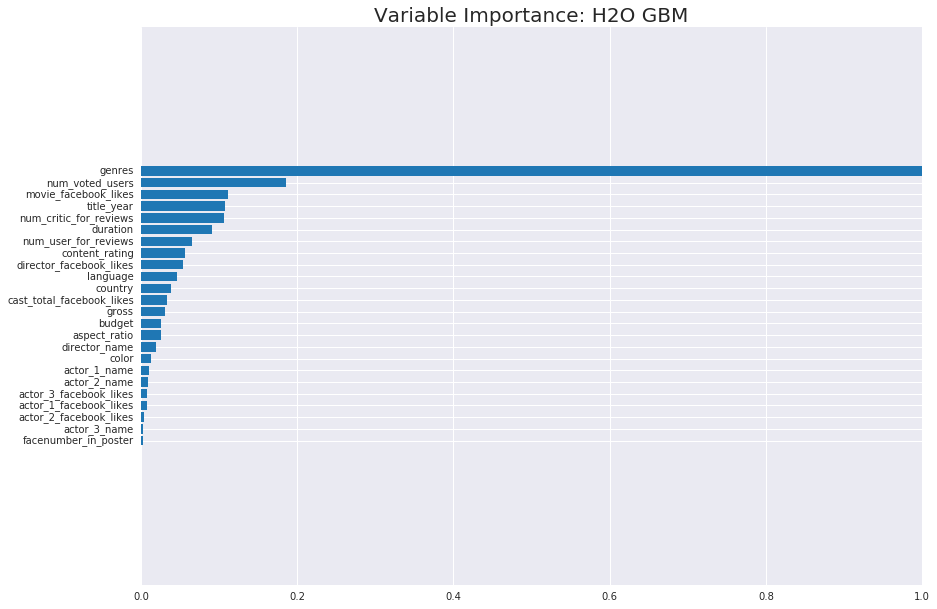

In [75]:
gbm_model.varimp_plot(num_of_features=27)

In [52]:
predictions = gbm_model.predict(test[:-1])

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [53]:
print(gbm_model.model_performance(test_data=test).r2())
print(gbm_model.model_performance(test_data=test).mse())

0.465157781084
0.681291728441


In [54]:
test=test.cbind(predictions)
test_df=test.as_data_frame()
result = test_df.sort_values(['predict0'],ascending=False)
result1 = result.reset_index(drop= True)


In [59]:
result1 = result1[['imdb_score','predict0']]

In [62]:
result1

,imdb_score,predict0
0,8.9,9.057414
1,8.7,8.947551
2,9.3,8.940788
3,8.6,8.878232
4,8.4,8.854154
5,8.8,8.806226
6,7.9,8.788336
7,8.2,8.735703
8,8.1,8.722720
9,9.1,8.705313


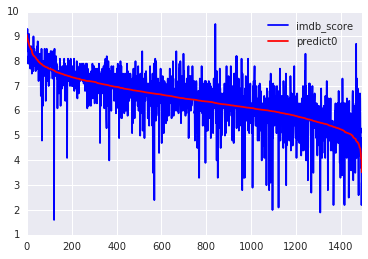

In [61]:
result1.plot(color=['blue','red'])

###### By using Random Forest model, we identified the top 5 important variables, which are: "genre", "num_voted_users", "num_user_for_reviews", "title_year" and "duration". 

In [76]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [77]:
%matplotlib inline

In [78]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,59 mins 26 secs
H2O cluster version:,3.10.4.4
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_yataolu_m1lb4m
H2O cluster total nodes:,1
H2O cluster free memory:,0
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [79]:
h2o.remove_all()                          #clean slate, in case cluster was already running

In [83]:
path = '/Users/yataolu/Desktop/datamining/movie_metadata.csv'

In [84]:
frame = h2o.import_file(path=path) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [85]:
frame.describe()

Rows:5043
Cols:28




,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,imdb_score
type,enum,enum,int,int,int,int,enum,int,int,enum,enum,string,int,int,enum,int,string,string,int,enum,enum,enum,int,int,int,real,int,real
mins,,,1.0,7.0,0.0,0.0,,0.0,162.0,,,NaN,5.0,0.0,,0.0,NaN,NaN,1.0,,,,218.0,1916.0,0.0,1.18,0.0,1.6
mean,,,140.194271981,107.201073986,686.509212391,645.009760956,,6560.04706116,48468407.5268,,,NaN,83668.160817,9699.06385088,,1.37117296223,NaN,NaN,272.770808443,,,,39752620.4364,2002.47051672,1651.75447316,2.22040305473,7525.96450525,6.4421376165
maxs,,,813.0,511.0,23000.0,23000.0,,640000.0,760505847.0,,,NaN,1689764.0,656730.0,,43.0,NaN,NaN,5060.0,,,,12215500000.0,2016.0,137000.0,16.0,349000.0,9.5
sigma,,,121.601675396,25.1974408088,2813.32860687,1665.04172845,,15020.75912,68452990.4388,,,NaN,138485.256806,18163.799124,,2.01357592,NaN,NaN,377.982885566,,,,206114898.449,12.4745989193,4042.43886264,1.3851125353,19320.4451099,1.12511586573
zeros,,,0,0,907,89,,26,0,,,0,0,33,,2152,0,0,0,,,,0,0,55,0,2181,0
missing,19,104,50,15,104,23,13,7,884,0,7,0,0,0,23,13,153,0,21,12,5,303,492,108,13,329,0,0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar��,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000.0,7.9
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End��,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,http://www.imdb.com/title/tt0449088/?ref_=fn_tt_tt_1,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0.0,7.1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre��,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_tt_tt_1,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000.0,6.8


In [86]:
# split into training, validation and test
train, test = frame.split_frame([0.7])

In [87]:
# assign target and inputs
y = 'imdb_score'
X = ['genres','title_year', 'num_voted_users','movie_facebook_likes','num_critic_for_reviews']
print(y)
print(X)

imdb_score
['genres', 'title_year', 'num_voted_users', 'movie_facebook_likes', 'num_critic_for_reviews']


In [88]:
# elastic net regularized regression 
#   - Gaussian family, i.e. squared loss, for linear regression
#   - L1 for variable selection
#   - L2 for handling multicollinearity
#   - IRLS for handling outliers
#   - with lamba parameter tuning for variable selection

# initialize
movie_glm = H2OGeneralizedLinearEstimator(family='gaussian',
                                         model_id='loan_glm1',
                                         solver='IRLSM',
                                         standardize=True,
                                         lambda_search=True)

# train 
movie_glm.train(X, y, training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [89]:
movie_glm.coef()

{u'Intercept': 56.33947441629374,
 u'genres.Action': 0.0,
 u'genres.Action|Adventure': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Crime|Family|Fantasy': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Family': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Family|Fantasy': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Family|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Fantasy': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Comedy|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Drama|Fantasy|Sci-Fi': 0.0,
 u'genres.Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller': 0.0,
 u'genres.Action|Adventure|Animation|Family': 0.0,
 u'genres.Action|Adventure|Animation|Family|Fanta

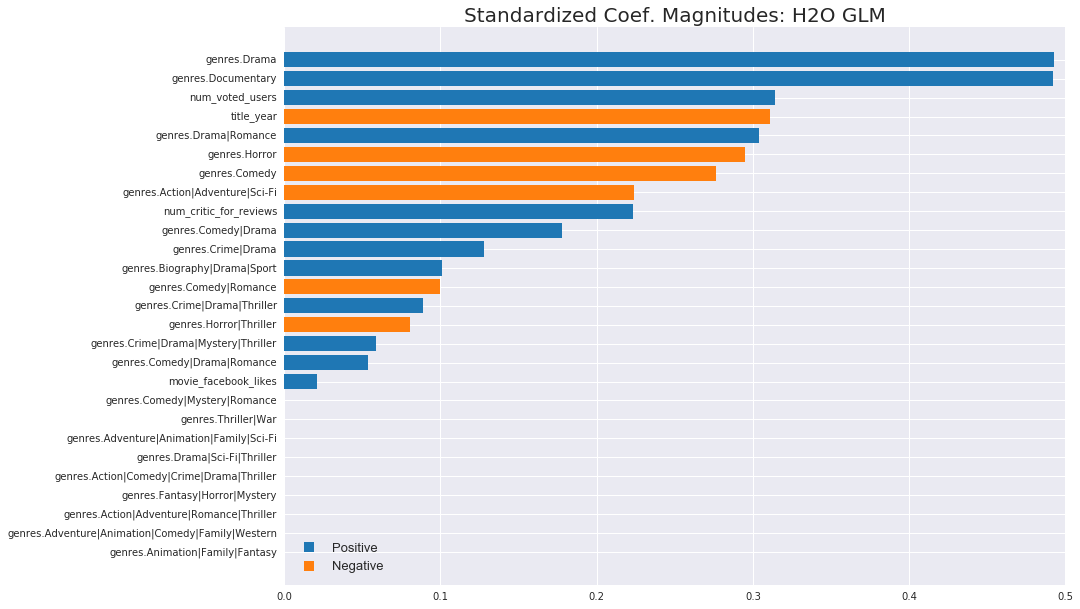

In [90]:
movie_glm.std_coef_plot(num_of_features=27)

In [94]:
movie_glm.equa()

AttributeError: type object 'H2OGeneralizedLinearEstimator' has no attribute 'equa'

In [64]:
# measure train and test MSE
print(loan_glm.mse(train=True))
print(loan_glm.model_performance(test_data=test).mse())

0.980385052385
0.953588854072


In [ ]:
h2o.cluster().shutdown(prompt=False)